The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](../../imgs/Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

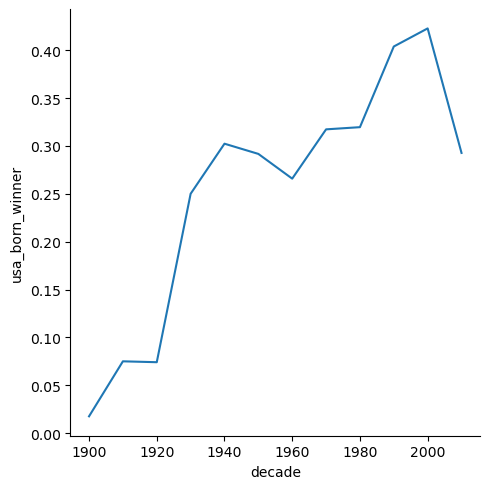

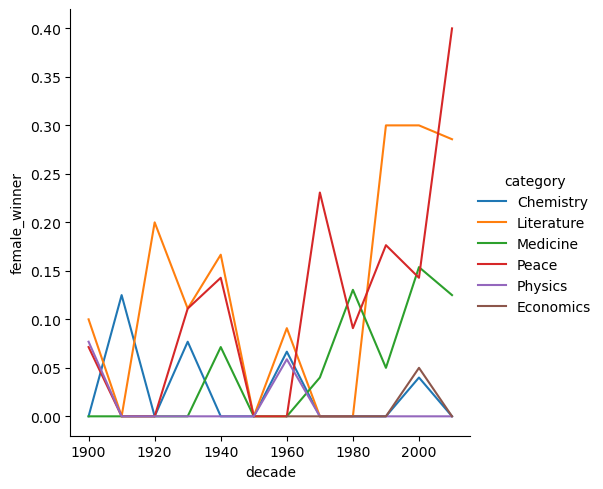

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np


## read in the csv
#nobel = pd.read_csv("data/nobel.csv")
nobel = pd.read_csv("../../data/nobel.csv")

## get the top gender
gender_count = nobel.groupby("sex")["sex"].count().sort_values(ascending=False)
top_gender = gender_count.head(1).index.values.astype(str)[0]

## get the top country
country_count = nobel.groupby("organization_country")["organization_country"].count().sort_values(ascending=False)
top_country = country_count.head(1).index.values.astype(str)[0]

## Calculate the proportion of US-born winners per decase
nobel['usa_born_winner'] = (nobel['birth_country'] == 'United States of America')
nobel['decade'] = [ int(np.floor(year/10) * 10) for year in np.array(nobel['year'])]
prop_usa_winners = nobel.groupby(by='decade', as_index=False)['usa_born_winner'].mean()

## Make a line plot of the decade vs "usa_born_winner"
ax1 = sns.relplot(data=prop_usa_winners, x='decade', y='usa_born_winner', kind="line")

## Calculate the proportion of female laureates per decade and category.
nobel['female_winner'] = (nobel['sex'] == 'Female')
prop_female_winners = nobel.groupby(by=['decade', 'category'], as_index=False)['female_winner'].mean()

## Make a line plot of the decade vs "female winner"
ax2 = sns.relplot(data=prop_female_winners, x='decade', y='female_winner', hue='category', kind="line")

## Who was the first woman to receive a Nobel Prize, and in what category?
first_female = nobel[nobel['female_winner'] == True].nsmallest(1, 'year')
first_woman_name = first_female["full_name"].values.astype(str)[0]
first_woman_category = first_female["category"].values.astype(str)[0]

## Find the individuals or organizations who have won multiple Nobel Prizes
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)